# To be completed at the Live Session and in your own time.

These set of examples we will help you get familiar with non parametric tests and correlations within a Jupyter notebook.   The questions coloured green are important practice for CA, particularly CA 2.

Before attempting these examples, please ensure you have read through [Chapter 6 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2024/blob/master/blended_exercises/Chapter6/Chapter6.ipynb) and have completed the Learning Central **Chapter 6 quiz**. 

***

#  Credible Intervals

## <font color=#30a64d>Question</font>

Professor Dumbledore, studying the extinction of dragons, discovers a new set of egg remnants in an unexplored valley in Madagascar. The remnants are radio carbon dated and found to have the following ages in years:

2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59

Professor Snape however did a previous study in the next valley where he found eggs that were on average 1200 years old, following a normal distribution with standard deviation of 300 years. 

1. What is the mean and standard deviation of the age of elephant bird eggs based on Dumbledore's data?

2. Write down an analytical expression for the mean of the ages that takes into account both Professor Dumbledore's new data and the previous age estimate from Professor Snape. Estimate the variance in your mean value.

3. Plot and discuss your results including a discussion of your methods.

### Answer

In [2]:
import numpy as np

mean_Snape = 1200
std_Snape = 300

Dumbledore_set = [2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59]

mean_Dumbledore = np.mean(Dumbledore_set)
std_Dumbledore = np.std(Dumbledore_set)

print("Professor Dumbledore's mean value is {:.2f}".format(mean_Dumbledore))
print("Professor Dumbledore's standard deviation is {:.2f}".format(std_Dumbledore))

Professor Dumbledore's mean value is 1663.10
Professor Dumbledore's standard deviation is 479.92


$$ \hat{\theta} = \frac{\sigma_o^2}{\sigma_o^2 + \sigma^2/n} \hat{X} + \frac{\sigma^2/n}{\sigma_o^2 + \sigma^2/n} \mu_0 $$

In [7]:
def FromPrior(prior_mean, prior_std, data):
    n = len(data)
    data_mean = np.mean(data)
    data_std = np.std(data)
    
    # calculate mean   
    data_prefactor = prior_std**2 / (prior_std**2 + data_std**2/n)
    prior_prefactor = (data_std**2/n) / (prior_std**2 + data_std**2/n)
    mean = data_prefactor*data_mean + prior_prefactor*prior_mean
    
    # calculate variance
    variance = (prior_std**2 * (data_std**2)/n) / (prior_std**2 + (data_std**2)/n)
    return mean, variance

comb_mean, comb_var = FromPrior(mean_Snape, std_Snape, Dumbledore_set)

print("combined mean = {:.2f}".format(comb_mean))
print("combined variance = {:.2f}".format(comb_var))
print("combined std_dev = {:.2f}".format(np.sqrt(comb_var)))


combined mean = 1568.73
combined variance = 18338.78
combined std_dev = 135.42


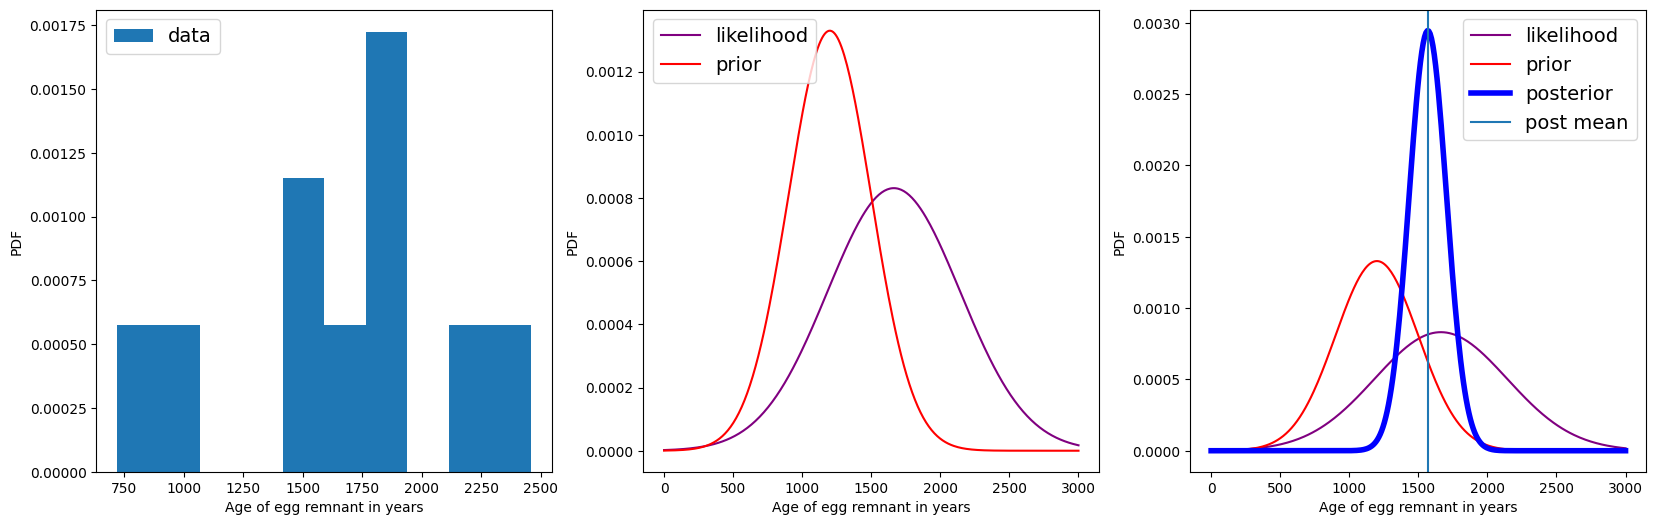

In [8]:
import matplotlib.pyplot as plt
from scipy.stats import norm

d = np.linspace(0,3000,300)

plt.figure(figsize=(20,6))
# for plotting

plt.subplot(131)
plt.hist(Dumbledore_set,density=True,label='data')
plt.legend(loc='upper left',fontsize=14)
# plt.xlim(155,180)
# plt.ylim(0,0.25)
plt.xlabel('Age of egg remnant in years')
plt.ylabel('PDF')

plt.subplot(132)
plt.plot(d,norm.pdf(d,mean_Dumbledore,std_Dumbledore),label='likelihood',c='purple') #likelihood
plt.plot(d,norm.pdf(d,mean_Snape,std_Snape),label='prior',c='red') # prior distribution
plt.legend(loc='upper left',fontsize=14)
# plt.xlim(155,180)
# plt.ylim(0,0.25)
plt.xlabel('Age of egg remnant in years')
plt.ylabel('PDF')

plt.subplot(133)
plt.plot(d,norm.pdf(d,mean_Dumbledore,std_Dumbledore),label='likelihood',c='purple') #likelihood
plt.plot(d,norm.pdf(d,mean_Snape,std_Snape),label='prior',c='red') # prior distribution
plt.plot(d,norm.pdf(d,comb_mean,np.sqrt(comb_var)),label='posterior',c='blue',lw=4)
# plt.xlim(155,180)
# plt.ylim(0,0.25)
plt.axvline(comb_mean,label='post mean')
plt.legend(loc='upper right',fontsize=14)
plt.xlabel('Age of egg remnant in years')
plt.ylabel('PDF')
plt.show()

The prior is quite far from the data. The data has some peaks at lower values which gives a higher standard deviation and broadens the distribution. 
The posterior, given the prior information, still favours the 2nd data set from Prof. Dumbledore over the prior dataset from Professor Snape. The posterior distribution is also narrower than the distributions for both datasets.